In [2]:
import numpy as np
import torch
import pandas as pd
from lineartoydata import *
from lineardatatools import *
%load_ext autoreload
%autoreload 2

In [4]:
def rotated_linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y, rotation):
    """c are the structural parameters and s are the standard deviations of the error terms.
    For each x: z -c_x-> x+e_x
    For t: z -c_t-> t+e_t
    For y: z -c_yz-> y+e_y <-c_yt- t
    rotation is the rotation matrix that we add at the end for the proxy variables."""
    x_dim = len(c_x)
    z = np.random.standard_normal((num_samples,1))
    x = np.random.normal(np.tile(c_x, (num_samples,1))*z,
                         np.tile(s_x, (num_samples,1)),(num_samples, x_dim))
    x = x.dot(rotation.T)
    t = np.random.normal(np.tile(c_t, (num_samples,1))*z,
                         np.tile(s_t, (num_samples,1)),(num_samples, 1))
    y = np.random.normal(np.tile(c_yz, (num_samples,1))*z + np.tile(c_yt, (num_samples,1))*t,
                        np.tile(s_y, (num_samples,1)), (num_samples, 1))
    
    df = pd.DataFrame(np.concatenate([z,x,t,y], axis=1), 
                      columns=['z'] + ['x{}'.format(i) for i in range(x_dim)] + ['t','y'])
    return df

In [38]:
num_samples = 5000
c_x = np.array([1,2,0])
s_x = np.array([0.5,0.7,20])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])
alpha = 45/180*np.pi
beta = -45/180*np.pi
gamma = 45/180*np.pi
rotation = np.array([[np.cos(alpha), -np.sin(alpha),0],[np.sin(alpha),np.cos(alpha),0],[0,0,1]])\
            .dot(np.array([[np.cos(beta), 0, np.sin(beta)],[0,1,0],[-np.sin(beta),0,np.cos(beta)]]))\
            .dot(np.array([[1,0,0],[0,np.cos(gamma), -np.sin(gamma)],[0,np.sin(gamma),np.cos(gamma)]]))

In [50]:
df = rotated_linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y, rotation)

In [51]:
from torch.utils.data import DataLoader
dataset = LinearDataset(df)
dataloader = LinearDataLoader(dataset, validation_split=0.0, shuffle=True)
train_loader, test_loader = dataloader.get_loaders(batch_size=500)

In [83]:
num_epochs = 500
lr_start = 0.02
lr_end = 0.001
input_dim = len(c_x)

Training Results - Epoch 1 - y_reconc_loss: 845.0190 x_reconc_loss: 14662.7285 t_reconc_loss: 771.7801 kld_loss: 1327.1161 total_loss: 17606.6437 learning rate: 0.0199
Training Results - Epoch 2 - y_reconc_loss: 796.9770 x_reconc_loss: 5591.1333 t_reconc_loss: 771.0103 kld_loss: 1550.7342 total_loss: 8709.8550 learning rate: 0.0198
Training Results - Epoch 3 - y_reconc_loss: 784.3988 x_reconc_loss: 5344.1425 t_reconc_loss: 770.7959 kld_loss: 976.8407 total_loss: 7876.1780 learning rate: 0.0196
Training Results - Epoch 4 - y_reconc_loss: 780.7391 x_reconc_loss: 5234.4532 t_reconc_loss: 770.1488 kld_loss: 375.8221 total_loss: 7161.1631 learning rate: 0.0195
Training Results - Epoch 5 - y_reconc_loss: 776.4551 x_reconc_loss: 5222.8097 t_reconc_loss: 771.3124 kld_loss: 222.1573 total_loss: 6992.7346 learning rate: 0.0194
Training Results - Epoch 6 - y_reconc_loss: 775.8075 x_reconc_loss: 5196.7191 t_reconc_loss: 771.1715 kld_loss: 177.4830 total_loss: 6921.1812 learning rate: 0.0193
Traini

Training Results - Epoch 99 - y_reconc_loss: 769.0432 x_reconc_loss: 4930.1539 t_reconc_loss: 771.5489 kld_loss: 257.1241 total_loss: 6727.8700 learning rate: 0.0111
Training Results - Epoch 100 - y_reconc_loss: 770.0341 x_reconc_loss: 4948.1680 t_reconc_loss: 771.5540 kld_loss: 240.9440 total_loss: 6730.7000 learning rate: 0.0110
Training Results - Epoch 101 - y_reconc_loss: 767.7456 x_reconc_loss: 4939.4405 t_reconc_loss: 770.9658 kld_loss: 253.9014 total_loss: 6732.0534 learning rate: 0.0109
Training Results - Epoch 102 - y_reconc_loss: 767.3946 x_reconc_loss: 4923.6190 t_reconc_loss: 771.3036 kld_loss: 262.7712 total_loss: 6725.0885 learning rate: 0.0109
Training Results - Epoch 103 - y_reconc_loss: 768.7659 x_reconc_loss: 4938.8419 t_reconc_loss: 771.4378 kld_loss: 244.2654 total_loss: 6723.3110 learning rate: 0.0108
Training Results - Epoch 104 - y_reconc_loss: 768.4420 x_reconc_loss: 4950.5058 t_reconc_loss: 771.4868 kld_loss: 247.9650 total_loss: 6738.3997 learning rate: 0.0107

Training Results - Epoch 196 - y_reconc_loss: 707.9810 x_reconc_loss: 1695.9727 t_reconc_loss: 719.0363 kld_loss: 2160.5329 total_loss: 5283.5229 learning rate: 0.0062
Training Results - Epoch 197 - y_reconc_loss: 710.0844 x_reconc_loss: 1798.5192 t_reconc_loss: 720.7938 kld_loss: 2143.2233 total_loss: 5372.6207 learning rate: 0.0061
Training Results - Epoch 198 - y_reconc_loss: 710.1919 x_reconc_loss: 1813.1549 t_reconc_loss: 718.6961 kld_loss: 2107.2619 total_loss: 5349.3047 learning rate: 0.0061
Training Results - Epoch 199 - y_reconc_loss: 705.2603 x_reconc_loss: 1792.6964 t_reconc_loss: 716.5708 kld_loss: 2071.1668 total_loss: 5285.6942 learning rate: 0.0061
Training Results - Epoch 200 - y_reconc_loss: 709.6558 x_reconc_loss: 1703.9181 t_reconc_loss: 720.4249 kld_loss: 2158.3438 total_loss: 5292.3426 learning rate: 0.0060
Training Results - Epoch 201 - y_reconc_loss: 707.4582 x_reconc_loss: 1728.2886 t_reconc_loss: 717.6018 kld_loss: 2179.6952 total_loss: 5333.0438 learning rate:

Training Results - Epoch 292 - y_reconc_loss: 704.2629 x_reconc_loss: 1489.9629 t_reconc_loss: 717.1877 kld_loss: 2314.5940 total_loss: 5226.0075 learning rate: 0.0035
Training Results - Epoch 293 - y_reconc_loss: 704.0276 x_reconc_loss: 1464.3135 t_reconc_loss: 718.5475 kld_loss: 2333.6686 total_loss: 5220.5573 learning rate: 0.0035
Training Results - Epoch 294 - y_reconc_loss: 705.7591 x_reconc_loss: 1512.3835 t_reconc_loss: 716.8839 kld_loss: 2319.6615 total_loss: 5254.6878 learning rate: 0.0034
Training Results - Epoch 295 - y_reconc_loss: 707.0245 x_reconc_loss: 1517.1497 t_reconc_loss: 719.7977 kld_loss: 2271.8672 total_loss: 5215.8391 learning rate: 0.0034
Training Results - Epoch 296 - y_reconc_loss: 705.4531 x_reconc_loss: 1544.7371 t_reconc_loss: 716.7699 kld_loss: 2266.3798 total_loss: 5233.3397 learning rate: 0.0034
Training Results - Epoch 297 - y_reconc_loss: 704.7346 x_reconc_loss: 1510.3725 t_reconc_loss: 717.7808 kld_loss: 2286.1253 total_loss: 5219.0132 learning rate:

Training Results - Epoch 388 - y_reconc_loss: 702.7274 x_reconc_loss: 1482.7018 t_reconc_loss: 715.9944 kld_loss: 2339.3985 total_loss: 5240.8222 learning rate: 0.0020
Training Results - Epoch 389 - y_reconc_loss: 702.5864 x_reconc_loss: 1444.3714 t_reconc_loss: 717.7048 kld_loss: 2332.8921 total_loss: 5197.5548 learning rate: 0.0019
Training Results - Epoch 390 - y_reconc_loss: 703.2634 x_reconc_loss: 1445.2805 t_reconc_loss: 717.7007 kld_loss: 2350.3066 total_loss: 5216.5511 learning rate: 0.0019
Training Results - Epoch 391 - y_reconc_loss: 703.5957 x_reconc_loss: 1409.4378 t_reconc_loss: 718.3163 kld_loss: 2375.2115 total_loss: 5206.5613 learning rate: 0.0019
Training Results - Epoch 392 - y_reconc_loss: 703.7870 x_reconc_loss: 1425.4529 t_reconc_loss: 716.5478 kld_loss: 2363.6914 total_loss: 5209.4791 learning rate: 0.0019
Training Results - Epoch 393 - y_reconc_loss: 701.4359 x_reconc_loss: 1426.2084 t_reconc_loss: 719.1856 kld_loss: 2363.0020 total_loss: 5209.8320 learning rate:

Training Results - Epoch 484 - y_reconc_loss: 701.3574 x_reconc_loss: 1380.2350 t_reconc_loss: 716.7880 kld_loss: 2394.7317 total_loss: 5193.1122 learning rate: 0.0011
Training Results - Epoch 485 - y_reconc_loss: 701.9688 x_reconc_loss: 1401.1099 t_reconc_loss: 716.6017 kld_loss: 2384.2602 total_loss: 5203.9405 learning rate: 0.0011
Training Results - Epoch 486 - y_reconc_loss: 703.0146 x_reconc_loss: 1401.2333 t_reconc_loss: 715.3952 kld_loss: 2388.1392 total_loss: 5207.7824 learning rate: 0.0011
Training Results - Epoch 487 - y_reconc_loss: 702.8837 x_reconc_loss: 1391.6781 t_reconc_loss: 717.5343 kld_loss: 2384.8040 total_loss: 5196.9001 learning rate: 0.0011
Training Results - Epoch 488 - y_reconc_loss: 702.3284 x_reconc_loss: 1389.6652 t_reconc_loss: 716.9770 kld_loss: 2390.0950 total_loss: 5199.0655 learning rate: 0.0011
Training Results - Epoch 489 - y_reconc_loss: 701.2616 x_reconc_loss: 1379.9682 t_reconc_loss: 717.5350 kld_loss: 2400.2237 total_loss: 5198.9886 learning rate:

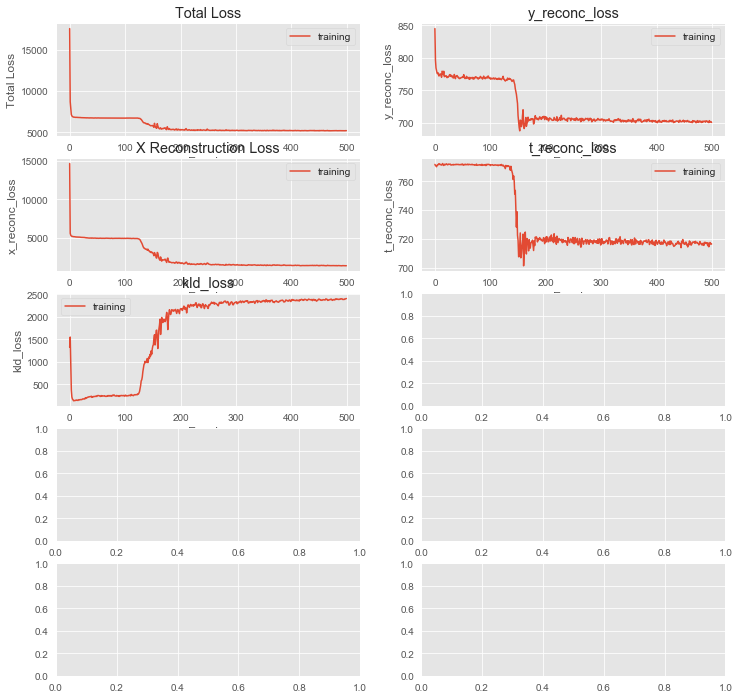

In [84]:
model = run_cevae(num_epochs, lr_start, lr_end, train_loader, test_loader, input_dim, z_dim=10,
              device='cpu', plot_curves=True, print_logs=True, binary_t_y=False,
              p_y_zt_nn=True, decoder_hidden_dim=20, decoder_num_hidden=3,
              q_z_xty_nn=True, encoder_hidden_dim=20, encoder_num_hidden=3,
              p_x_z_nn = True, p_t_z_nn = True, p_y_zt_std = True,
              p_x_z_std = True, p_t_z_std = True
             )

### Notes:
- Seems to work quite well with regular linear networks if optimized well enough -> not after all, again posterior collapse issues
- NNs? q(z|x,t,y) a neural network doesn't necessary solve the problem, may depend on the complexity
- Could work with covariance matrix estimation as well, maybe wouldn't need extra dimensions then

In [73]:
model.decoder.y_nn.weight

Parameter containing:
tensor([[ 0.0089, -0.0258,  0.7646, -0.0151,  0.0317,  0.0222,  0.5983, -0.0358,
          0.0046,  0.0467,  0.6951]], requires_grad=True)

In [100]:
avg_causal_dist, py_dot_model, py_dot_true, y_range, t_range, pt_true = \
    avg_causal_L1_dist_MC(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, nsample=10000)
avg_causal_dist

0.03506694871994239

In [90]:
xt = torch.Tensor([10*[0] + [2]])
model.decoder.y_nn_real(xt)

tensor([[2.1141, 0.0388]], grad_fn=<AddmmBackward>)

In [9]:
rotation.T.dot(torch.cat([model.decoder.x_nns[0].weight,
    model.decoder.x_nns[1].weight,
    model.decoder.x_nns[2].weight],0).detach().numpy())

array([[ 0.88539487, -0.03986237],
       [ 2.08603029, -0.12384912],
       [ 0.88868612, 16.03595213]])

<built-in method size of Tensor object at 0x0000026A8BD96D18>


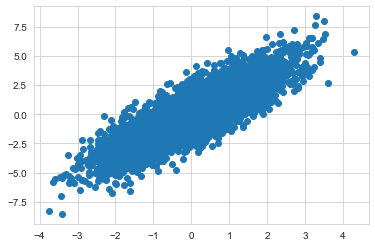

In [10]:
z,x,t,y = model.decoder.sample(5000)
xrotated = x.detach().numpy().dot(rotation)
plt.plot(xrotated[:,0],xrotated[:,1],'o')

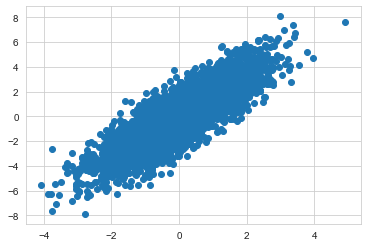

In [11]:
import seaborn as sns
xrotated = df[['x0','x1','x2']].to_numpy().dot(rotation)
plt.plot(xrotated[:,0],xrotated[:,1],'o')

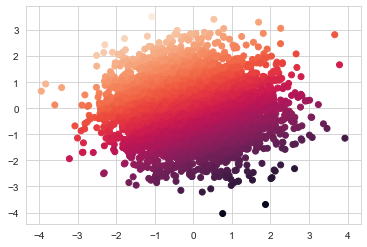

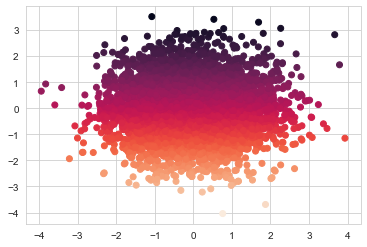

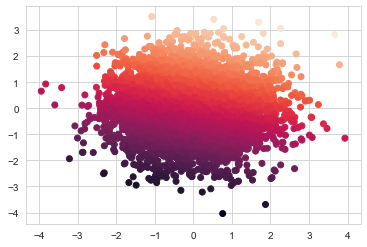

In [25]:
plt.scatter(z[:,0].detach(),z[:,1].detach(),
         c=model.decoder.x_nns[0](z).detach().squeeze())
plt.show()
plt.scatter(z[:,0].detach(),z[:,1].detach(),
         c=model.decoder.x_nns[1](z).detach().squeeze())
plt.show()
plt.scatter(z[:,0].detach(),z[:,1].detach(),
         c=model.decoder.x_nns[2](z).detach().squeeze())

# Experiment with linear decoder&encoder, z_dim=1,...10

In [112]:
datasizes = 5000
c_x = np.array([1,2,0])
s_x = np.array([0.5,0.7,20])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])
alpha = 45/180*np.pi
beta = -45/180*np.pi
gamma = 45/180*np.pi
rotation = np.array([[np.cos(alpha), -np.sin(alpha),0],[np.sin(alpha),np.cos(alpha),0],[0,0,1]])\
            .dot(np.array([[np.cos(beta), 0, np.sin(beta)],[0,1,0],[-np.sin(beta),0,np.cos(beta)]]))\
            .dot(np.array([[1,0,0],[0,np.cos(gamma), -np.sin(gamma)],[0,np.sin(gamma),np.cos(gamma)]]))

#df = rotated_linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y, rotation)
#dataset = LinearDataset(df)
#dataloader = LinearDataLoader(dataset, validation_split=0.0, shuffle=True)
train_loader, test_loader = dataloader.get_loaders(batch_size=500)

num_epochs = 500
lr_start = 0.02
lr_end = 0.002
input_dim = len(c_x)
z_dim = [1,2,3,4,5,6,7,8,9,10]

binary_t_y=False
p_y_zt_nn=False
q_z_xty_nn=False
generate_df = rotated_linear_data_df
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y, rotation]
BATCH_SIZE=500
track_function = lambda model: model.decoder.y_nn.weight
true_value = c_yt
datasize_times = 10

folder = "rotated_linear_zdim_1_10"
name = "rotated_linear_zdim_1_10"

In [37]:
dfs, models = run_model_for_data_sets(datasizes, datasize_times, num_epochs,
                            lr_start, lr_end, input_dim, z_dim, folder,name, BATCH_SIZE,
                            binary_t_y, p_y_zt_nn, q_z_xty_nn,
                            generate_df, dataparameters, track_function, true_value,
                            device='cpu', p_x_z_nn=False, p_t_z_nn=False, p_y_zt_std=False, p_x_z_std=False,
                            p_t_z_std=False, decoder_hidden_dim=3, decoder_num_hidden=3,
                            encoder_hidden_dim=4, encoder_num_hidden=3,labels=z_dim)

Creation of the directory data/rotated_linear_zdim_1_10/ failed. Trying to empty the same folder.
Training data size 5000, run 1
Estimated causal effect: Parameter containing:
tensor([[0.0015, 1.2545]], requires_grad=True) true value: [1]
Training data size 5000, run 2
Estimated causal effect: Parameter containing:
tensor([[-0.0018,  1.2393]], requires_grad=True) true value: [1]
Training data size 5000, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.0159,  1.2469]], requires_grad=True) true value: [1]
Training data size 5000, run 4
Estimated causal effect: Parameter containing:
tensor([[0.0034, 1.2405]], requires_grad=True) true value: [1]
Training data size 5000, run 5
Estimated causal effect: Parameter containing:
tensor([[0.0180, 1.2144]], requires_grad=True) true value: [1]
Training data size 5000, run 6
Estimated causal effect: Parameter containing:
tensor([[0.0093, 1.2432]], requires_grad=True) true value: [1]
Training data size 5000, run 7
Estimated causal effe

Estimated causal effect: Parameter containing:
tensor([[ 0.0035, -1.6846, -0.0032,  0.0649, -0.8541, -0.0058, -0.1063]],
       requires_grad=True) true value: [1]
Training data size 5000, run 2
Estimated causal effect: Parameter containing:
tensor([[ 7.1037e-02,  9.8619e-01, -9.8625e-04,  1.3370e+00, -1.5086e-03,
         -3.2808e-03,  1.4638e-01]], requires_grad=True) true value: [1]
Training data size 5000, run 3
Estimated causal effect: Parameter containing:
tensor([[-0.0142, -0.8125, -0.0268,  0.0365,  0.7683, -0.1713,  0.5809]],
       requires_grad=True) true value: [1]
Training data size 5000, run 4
Estimated causal effect: Parameter containing:
tensor([[-0.0039, -0.0024,  0.1005, -0.5606,  0.0357,  0.7763,  1.0583]],
       requires_grad=True) true value: [1]
Training data size 5000, run 5
Estimated causal effect: Parameter containing:
tensor([[-0.0037,  1.0732,  0.7136, -0.0027,  0.4919, -0.8214,  0.1000]],
       requires_grad=True) true value: [1]
Training data size 5000, r

Estimated causal effect: Parameter containing:
tensor([[ 1.2884e+00, -2.3291e-03,  3.0857e-04,  1.3937e+00, -1.8041e-03,
         -2.2551e-03, -6.1257e-02,  2.1619e-03,  1.8964e-03, -1.3056e-01]],
       requires_grad=True) true value: [1]
Training data size 5000, run 8
Estimated causal effect: Parameter containing:
tensor([[-2.1597e-03,  9.8589e-04, -8.1815e-02,  1.9873e-04,  8.2775e-01,
          7.1451e-01, -3.1531e-02, -4.9233e-03,  2.5579e-03,  1.7238e+00]],
       requires_grad=True) true value: [1]
Training data size 5000, run 9
Estimated causal effect: Parameter containing:
tensor([[ 0.7775,  0.0072, -0.0915,  0.0645,  0.0155,  0.7133, -0.0100,  0.0238,
         -0.0286,  0.6665]], requires_grad=True) true value: [1]
Training data size 5000, run 10
Estimated causal effect: Parameter containing:
tensor([[ 0.0020,  0.0084, -1.2132,  0.0036,  0.7627,  0.0059, -0.6390,  0.4941,
          0.0063,  0.0447]], requires_grad=True) true value: [1]
Training data size 5000, run 1
Estimated

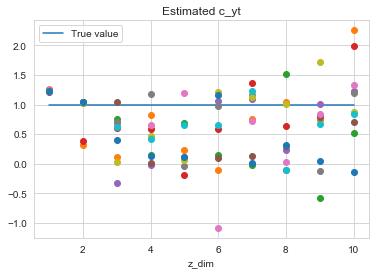

In [127]:
plt.figure()
plt.title("Estimated c_yt")
plt.xlabel("z_dim")
plt.plot([1,10],2*[c_yt])
plt.legend(["True value"])
for zd in z_dim:
    for j in range(datasize_times):
        plt.plot([zd],models[zd][j].decoder.y_nn.weight[0,-1].detach(),'o')

### Notes
- z_dim=1 causes constant bias but results in consistent estimate
- z_dim=2 gets it right most of the time, which makes sense since it's enough
- z_dim>2 causes problems, possibly again the posterior collapse thing?
- Higher than z_dim=2 wasn't tested with the easy data sets, so interesting in that sense also
- Could the diagonal covariance in the encoder be a problem in principle here?

# Experiment with all neural networks, z_dim=1,...10

In [16]:
datasizes = 5000
c_x = np.array([1,2,0])
s_x = np.array([0.5,0.7,20])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])
alpha = 45/180*np.pi
beta = -45/180*np.pi
gamma = 45/180*np.pi
rotation = np.array([[np.cos(alpha), -np.sin(alpha),0],[np.sin(alpha),np.cos(alpha),0],[0,0,1]])\
            .dot(np.array([[np.cos(beta), 0, np.sin(beta)],[0,1,0],[-np.sin(beta),0,np.cos(beta)]]))\
            .dot(np.array([[1,0,0],[0,np.cos(gamma), -np.sin(gamma)],[0,np.sin(gamma),np.cos(gamma)]]))

num_epochs = 500
lr_start = 0.02
lr_end = 0.001
input_dim = len(c_x)
z_dim = [1,2,3,4,5,6,7,8,9,10]

binary_t_y=False
p_y_zt_nn=True
q_z_xty_nn=True
p_x_z_nn=True
p_t_z_nn=True
p_y_zt_std=True
p_x_z_std=True
p_t_z_std=True
decoder_hidden_dim=20
encoder_hidden_dim=20
decoder_num_hidden=3
encoder_num_hidden=3


generate_df = rotated_linear_data_df
dataparameters = [c_x, c_t, c_yz, c_yt, s_x, s_t, s_y, rotation]
BATCH_SIZE=500
track_function = lambda model: avg_causal_L1_dist_MC(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=50, nsample=5000)[0]
true_value = 0
datasize_times = 10

folder = "rotated_nn_zdim_1_10"
name = "rotated_nn_zdim_1_10"

device='cpu'

In [131]:
dfs, models = run_model_for_data_sets(datasizes, datasize_times, num_epochs,
                            lr_start, lr_end, input_dim, z_dim, folder,name, BATCH_SIZE,
                            binary_t_y, p_y_zt_nn, q_z_xty_nn,
                            generate_df, dataparameters, track_function, true_value,
                            device='cpu', p_x_z_nn=p_x_z_nn, p_t_z_nn=p_t_z_nn, p_y_zt_std=p_y_zt_std, 
                            p_x_z_std=p_x_z_std, p_t_z_std=p_t_z_std, decoder_hidden_dim=decoder_hidden_dim, 
                            decoder_num_hidden=decoder_num_hidden, encoder_hidden_dim=encoder_hidden_dim, 
                            encoder_num_hidden=encoder_num_hidden, labels=z_dim)

Creation of the directory data/rotated_nn_zdim_1_10/ failed. Trying to empty the same folder.
Training data size 5000, run 1
Estimated causal effect: 0.16436482397576754 true value: 0
Training data size 5000, run 2
Estimated causal effect: 0.1535644468768568 true value: 0
Training data size 5000, run 3
Estimated causal effect: 0.15294028742935256 true value: 0
Training data size 5000, run 4
Estimated causal effect: 0.14104014170403809 true value: 0
Training data size 5000, run 5
Estimated causal effect: 0.17222631456032275 true value: 0
Training data size 5000, run 6
Estimated causal effect: 0.15734382493722585 true value: 0
Training data size 5000, run 7
Estimated causal effect: 0.16561327555753322 true value: 0
Training data size 5000, run 8
Estimated causal effect: 0.13279082390730654 true value: 0
Training data size 5000, run 9
Estimated causal effect: 0.14326173679450135 true value: 0
Training data size 5000, run 10
Estimated causal effect: 0.15417259675717446 true value: 0
Traini

Estimated causal effect: 0.03289325786077814 true value: 0
Training data size 5000, run 2
Estimated causal effect: 0.05082323488344776 true value: 0
Training data size 5000, run 3
Estimated causal effect: 0.05401838360277681 true value: 0
Training data size 5000, run 4
Estimated causal effect: 0.05564177943563658 true value: 0
Training data size 5000, run 5
Estimated causal effect: 0.03585005404193435 true value: 0
Training data size 5000, run 6
Estimated causal effect: 0.03585584138230229 true value: 0
Training data size 5000, run 7
Estimated causal effect: 0.06434169889191294 true value: 0
Training data size 5000, run 8
Estimated causal effect: 0.1355940252011669 true value: 0
Training data size 5000, run 9
Estimated causal effect: 0.04013311308297161 true value: 0
Training data size 5000, run 10
Estimated causal effect: 0.03794987719161517 true value: 0


In [17]:
dfs, models = load_dfs_models(folder, name,
                   input_dim, z_dim, device, binary_t_y,
                  p_y_zt_nn, q_z_xty_nn, 
                  p_x_z_nn=p_x_z_nn, p_t_z_nn=p_t_z_nn, p_y_zt_std=p_y_zt_std, 
                            p_x_z_std=p_x_z_std, p_t_z_std=p_t_z_std, decoder_hidden_dim=decoder_hidden_dim, 
                            decoder_num_hidden=decoder_num_hidden, encoder_hidden_dim=encoder_hidden_dim, 
                            encoder_num_hidden=encoder_num_hidden, label="z_dim")

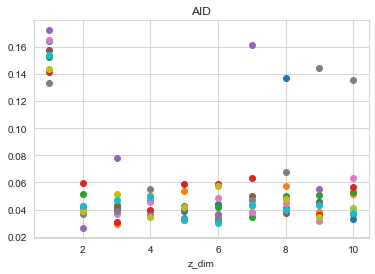

In [18]:
plt.figure()
plt.title("AID")
plt.xlabel("z_dim")
for zd in z_dim:
    for j in range(datasize_times):
        d = avg_causal_L1_dist_MC(models[zd][j], c_yt, c_yz, s_y, c_t, s_t, c_x, n=50, nsample=5000)[0]
        plt.plot([zd],d,'o')

In [38]:
x

array([[ -0.60666084,  12.14061   ,  -9.825106  ,  -0.7963084 ,
         -0.2525538 ,  -0.57944095],
       [  1.2085618 , -12.729738  ,   9.288577  ,  -0.7324395 ,
         -0.19950983,  -0.52501166],
       [  3.5148423 , -19.87834   ,  11.450756  ,  -0.76402354,
         -0.18740645,  -0.49242976],
       ...,
       [  0.38510436,  -5.661283  ,   4.365855  ,  -0.7211305 ,
         -0.23042709,  -0.56107867],
       [  1.0340862 ,  -5.5242844 ,   3.0078611 ,  -0.7160498 ,
         -0.22838503,  -0.55088985],
       [ -1.6188518 ,   1.4988097 ,   1.743924  ,  -0.7144464 ,
         -0.23911075,  -0.58577967]], dtype=float32)

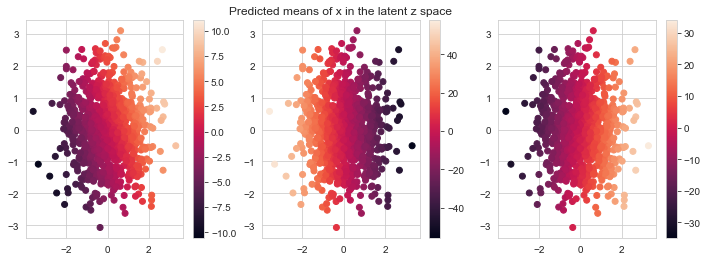

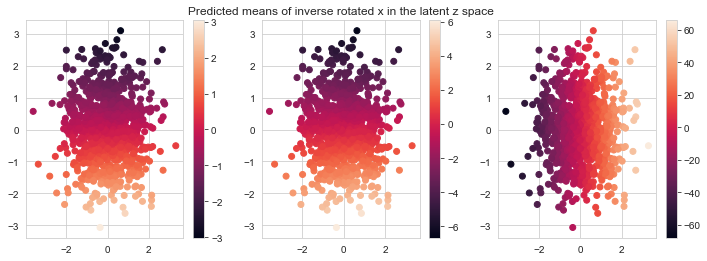

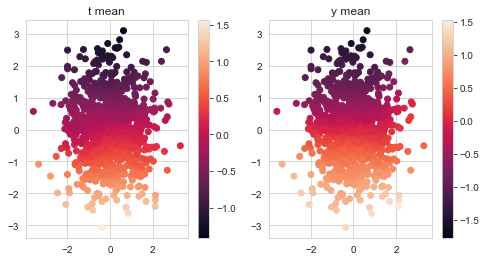

In [77]:
n=1000
z_sample = torch.randn((n,2))
x = models[2][0].decoder.x_nns_real(z_sample).detach().numpy()[:,:3]
t = models[2][0].decoder.t_nn_real(z_sample).detach().numpy()[:,0]
zt = torch.cat([z_sample, torch.zeros(n,1)],1)
y = models[2][0].decoder.y_nn_real(zt).detach().numpy()[:,0]
xrotated = x.dot(rotation)

fig1, ax1 = plt.subplots(1,3,figsize=(12,4))
for i in range(3):
    sc = ax1[i].scatter(z_sample[:,0],z_sample[:,1],c=x[:,i])
    plt.colorbar(mappable=sc,ax=ax1[i])
ax1[1].set_title("Predicted means of x in the latent z space")
plt.show()
    
fig2, ax2 = plt.subplots(1,3,figsize=(12,4))
for i in range(3):
    sc = ax2[i].scatter(z_sample[:,0],z_sample[:,1],c=xrotated[:,i])
    plt.colorbar(mappable=sc,ax=ax2[i])
ax2[1].set_title("Predicted means of inverse rotated x in the latent z space")
plt.show()

fig, ax = plt.subplots(1,2,figsize=(8,4))
sc0 = ax[0].scatter(z_sample[:,0],z_sample[:,1],c=t)
sc1 = ax[1].scatter(z_sample[:,0],z_sample[:,1],c=y)
plt.colorbar(sc0,ax=ax[0])
plt.colorbar(sc1,ax=ax[1])
ax[0].set_title("t mean")
ax[1].set_title("y mean")
plt.show()